# Generatore Monte Carlo di raggi cosmici

La distribuzione angolare dei raggi cosmici che raggiungono il suolo terresrre segue approssimativamente la legge $\mathrm{d}P(\theta,\phi)/\mathrm{d}\Omega = k \cos^2\theta$ con $0\leq\theta<\pi/2$.

Il punto di impatto al suolo è uniformemente distribuito sulla superficie.

* Scrivere un generatore di raggi cosmici distribuiti secondo questo modello.
* Graficarne la distribuzione del punto di impatto e della direzione di provenienza.
* Graficare un numero finito con l'utility di matplotlib [quiver](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html), che è pensata per visualizzare un campo vettoriale, ma noi la useremo in modo diverso

Opzionale:

* Definire la geometria di un semplice telescopio, ad es.: fatto da due piani quadrati orizzontali posti ad una certa altezza tra di loro
* Calcolare le intersezioni con i due piani di rivelatore dei raggi cosmici generati aventi punto di impatto sul piano di base
* Calcolare l'accettanza geometrica del telescopio rispetto ai raggi cosmici che arrivano al rivelatore di base

## Distribuzione angolare

La prima cosa da fere è generare punti in due dimensioni, $(\theta, \phi)$, tali che i punti siani distribuiti secondo la legge:

$\displaystyle \frac{\mathrm{d}P}{\mathrm{d}\Omega} = \frac{\mathrm{d}P}{\sin\theta\mathrm{d}\theta\,\mathrm{d}\phi} = k \cos^2\theta$ 

dove $k$ è una costante di normalizzazione e $0\le \theta <\pi/2$

Possiamo anche riscrivere:

$\displaystyle\frac{\mathrm{d}P}{\mathrm{d}\theta\,\mathrm{d}\phi}=f(\theta)\,g(\phi)= k\sin\theta\cos^2\theta$ 

Dove:

$f(\theta)=c_1\sin \theta\cos^2\theta$

$g(\phi) = c_2$

e $k=c_1 c_2$.

La distribuzione cumulativa di $f(\theta)$ è:

$\displaystyle F(\theta) = c_1 \int_{0}^\theta \sin \theta^\prime\cos^2\theta^\prime\,\mathrm{d}\theta^\prime = 
-\frac{c_1}{3}\left[\cos^3\theta^\prime\right]_{\theta^\prime=0}^{\theta^\prime=\theta} = 
\frac{c_1}{3}(1 - \cos^3\theta)$

Il coefficiente di normalizzazionre $c_1$ va posto in modo che sia $F(\pi/2) = 1$:

$\displaystyle 1 = \frac{c_1}{3}\left(1 - \cos^3 \frac{\pi}{2}\right) = \frac{c_1}{3}$

Quindi $c_1 = 3$ e $F(\theta) = 1 - \cos^3\theta$.

$F(\theta)$ va invertita per otterenere $\theta$ dall'equazione: $F(\theta)= r_1$, dove $r_1$ è un numero uniormemente distribuito in $[0,1\,[$:


$\displaystyle 1 - \cos^3\theta = r_1$

Da cui:


$\displaystyle\theta = \mathrm{arccos}(\sqrt[3]{1-r_1})\in \left[0, \frac{\pi}{2}\right[$


L'angolo $\phi$, come di consueto, si può generare unifrmemente tra $0$ e $2\pi$ a partire da un numero $r_2$ distribuito uniformemente in $[0,1\,[$:
$\phi = 2\pi r_2\in [0, 2\pi\,[$

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [19]:
def cosm_dir(size=1):
    return np.arccos((1 - np.random.random(size))**(1/3)), 2*math.pi*np.random.random(size)

In [89]:
n = 5000000
th, ph = cosm_dir(n)
st, ct = np.sin(th), np.cos(th)
sp, cp = np.sin(ph), np.cos(ph)
us, vs, ws = st*cp, st*sp, ct

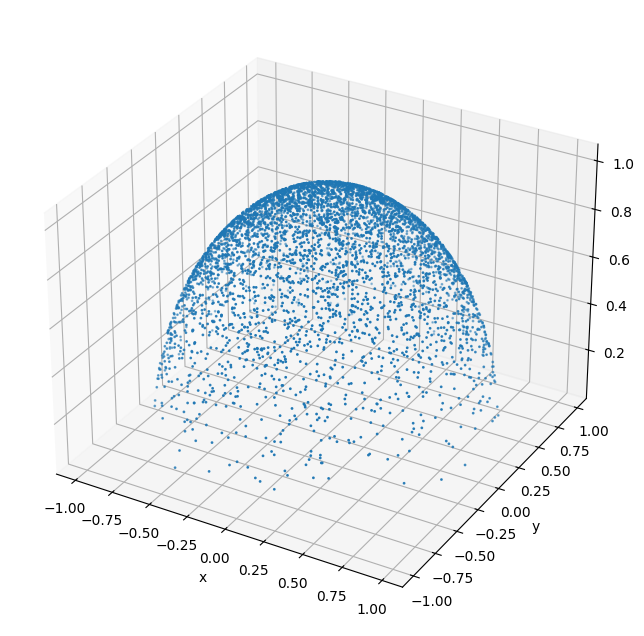

In [90]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
nmax = 5000
ax.scatter(us[:nmax], vs[:nmax], ws[:nmax], marker='o', s=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.show()

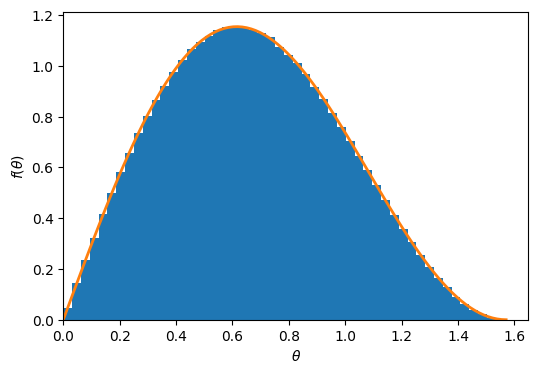

In [91]:
plt.figure(figsize = (6, 4), dpi = 100)
plt.hist(th, density=True, bins = 50)
xpts = np.linspace(0, math.pi/2, 100)
ypts = 3*np.sin(xpts)*np.cos(xpts)**2
plt.plot(xpts, ypts, linewidth=2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.xlim(0)
plt.show()

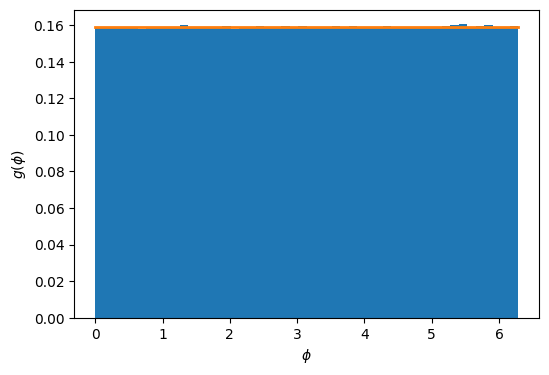

In [92]:
plt.figure(figsize=(6, 4), dpi=100)
plt.hist(ph, density=True, bins=50)
xpts = np.linspace(0, 2*math.pi, 100)
ypts = [0.5/math.pi]*len(xpts)
plt.plot(xpts, ypts, linewidth=2)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$g(\phi)$')
plt.show()

## Distribuzione dei punti di impatto

I punti di impatto vanno semplicemente generati uniformemente nella superficie che si vuole considerare. Tipicamente, questa è determinata dalla geometria del rivelatore di interesse.

Consideriamo un piano di $1\mathrm{m}\times 1\mathrm{m}$.

In [93]:
x0s = np.random.rand(n) - 0.5
y0s = np.random.rand(n) - 0.5
z0s = np.zeros(n)

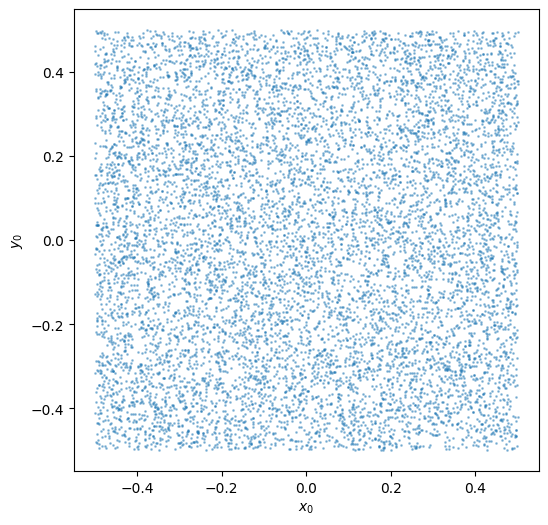

In [94]:
plt.figure(figsize=(6, 6), dpi=100)
nmax = 10000
plt.scatter(x0s[:nmax], y0s[:nmax], s=1, alpha=0.4)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$y_0$')
plt.show()

## Visualizzare i raggi cosmici

A questo punto, basta visualizzare i raggi come segmenti passanti per $(x_0, y_0)$ e con la direzione generata.

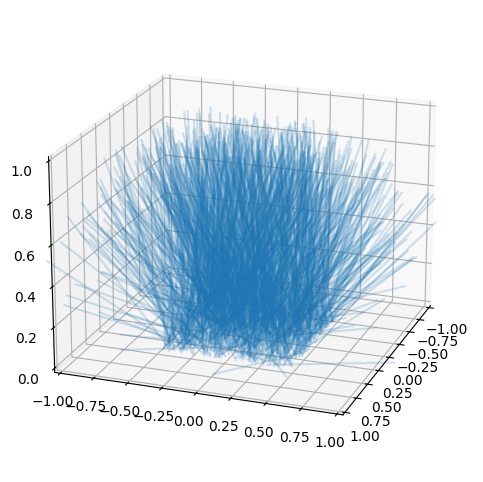

In [95]:
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
nmax = 1000
ax.quiver(x0s[:nmax], y0s[:nmax], z0s[:nmax], us[:nmax], vs[:nmax], ws[:nmax],
          length = 1, arrow_length_ratio=0, alpha=0.2)
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(0, 1)
plt.show()

# Intersezione con un rivelatore

L'applicazione tipica di un generatore del genere è selezionare i raggi cosmici che attraversano un rivelatore di geometria data.

Immaginiamo di avere due piani da $1\mathrm{m}\times 1\mathrm{m}$ uno a quota $z_0=0\mathrm{m}$, l'altro a quota $z_1=1\mathrm{m}$


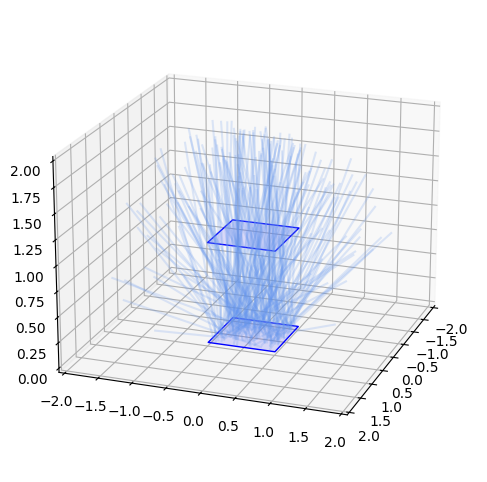

In [96]:
import mpl_toolkits.mplot3d as a3
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
nmax = 200
ax.quiver(x0s[:nmax], y0s[:nmax], z0s[:nmax], us[:nmax], vs[:nmax], ws[:nmax], length=2, arrow_length_ratio=0,
          normalize=True, color='cornflowerblue', alpha=0.2)
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(0,2)
plane_vtx = np.array([[-0.5, -0.5, 0], [0.5, -0.5, 0], [0.5, 0.5, 0], [-0.5, 0.5, 0]])
plane0 = a3.art3d.Poly3DCollection([plane_vtx], closed=True)
plane0.set_color('#0000ff20')
plane0.set_edgecolor('#0000ff')
ax.add_collection3d(plane0)
plane1 = a3.art3d.Poly3DCollection([plane_vtx + [0, 0, 1]], closed=True)
plane1.set_color('#0000ff20')
plane1.set_edgecolor('#0000ff')
ax.add_collection3d(plane1)
plt.show()

Abbiamo generato i raggi cosmici in modo che passino per il piano a quota $z_0=0\mathrm{m}$. 

Per ogni raggio cosmico, dobbiamo calcolare l'intersezione con il piano superiore e verificare che sia entro la geometria del piano.

Un punto sul raggio cosmico è stato parametrizzato come:

$\vec{r} = \vec{r_0} + l\, \vec{u}$.

Il punto di impatto sul piano a quota $h$ si trova risolvendo l'equazione:

$z = z_0 + l\, u_z = l\, u_z = h$

$l$ si ottiene semplicemente come:

$\displaystyle l = \frac{h}{u_z}$

Trovata $l$, dobbiamo verificare che il punto $\vec{r_0} + l\,\vec{u}$ abbia coordinate $x$ e $y$ entro il piano.


Quindi: 

$\displaystyle x_{\mathrm{min}} < {x_0} + \frac{h\, u_x}{u_z} < x_{\mathrm{max}}$

$\displaystyle y_{\mathrm{min}} < {y_0} + \frac{h\, u_y}{u_z} < y_{\mathrm{max}}$

In [97]:
plane_h = 1
x1s = x0s + plane_h*us/ws
y1s = y0s + plane_h*vs/ws
z1s = np.full(n, plane_h)
hits = (-0.5 < x1s) & (x1s < 0.5) & (-0.5 < y1s) & (y1s < 0.5)

Definiamo un colore diverso per i raggi che attraversano il rivelatore.

In [98]:
colors = ['red' if hit else 'cornflowerblue' for hit in hits]

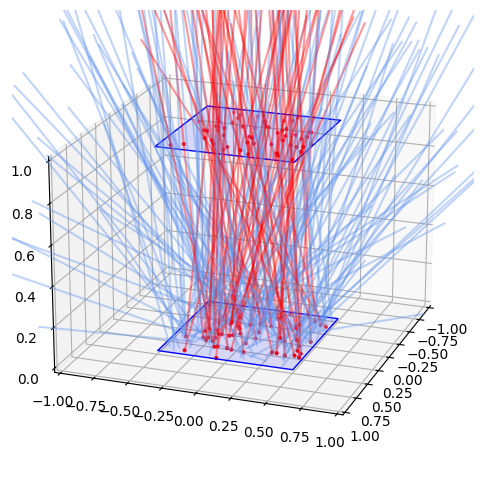

In [99]:
#%matplotlib notebook
import mpl_toolkits.mplot3d as a3
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
nmax = 200
x0max, y0max, z0max = x0s[:nmax], y0s[:nmax], z0s[:nmax]
x1max, y1max, z1max = x1s[:nmax], y1s[:nmax], z1s[:nmax]
umax, vmax, wmax = us[:nmax], vs[:nmax], ws[:nmax]
hitmax = hits[:nmax]
ax.quiver(x0max, y0max, z0max, umax, vmax, wmax, length=2, arrow_length_ratio=0,
          color=colors, alpha=0.4)
ax.scatter(x0max[hitmax], y0max[hitmax], z0max[hitmax], s=4, color='red')
ax.scatter(x1max[hitmax], y1max[hitmax], z1max[hitmax], s=4, color='red')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(0, 1)
plane_vtx=np.array([[-0.5, -0.5, 0], [0.5, -0.5, 0], [0.5, 0.5, 0], [-0.5, 0.5, 0]])
plane0 = a3.art3d.Poly3DCollection([plane_vtx])
plane0.set_color('#0000ff20')
plane0.set_edgecolor('#0000ff')
ax.add_collection3d(plane0)
plane1 = a3.art3d.Poly3DCollection([plane_vtx + [0, 0, 1]])
plane1.set_color('#0000ff20')
plane1.set_edgecolor('#0000ff')
ax.add_collection3d(plane1)
plt.show()

Grafichiamo la distribuzione angolare dei raggi cosmici che attraversano il rivelatore.
La distribuzione sarebbe difficilmente ottenibile per via analitica, e il Monte Carlo risulta una tecnica particolarmente vantaggiosa e flessibile in base alla configurazione del rivelatore.

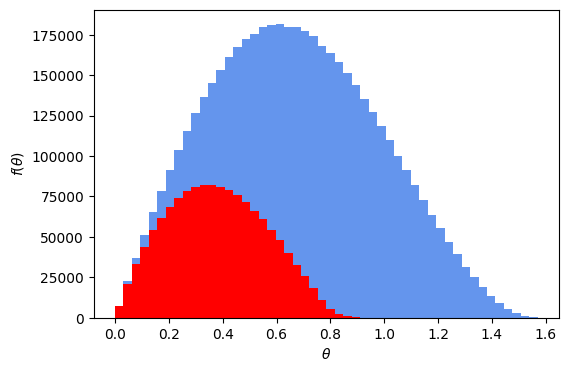

In [100]:
#%matplotlib inline
plt.figure(figsize=(6, 4), dpi=100)
theta_range=[0, math.pi/2]
plt.hist(th, density=False, bins=50, range=theta_range, color='cornflowerblue')
plt.hist(th[hits], density=False, bins=50, range=theta_range, color='red')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.show()

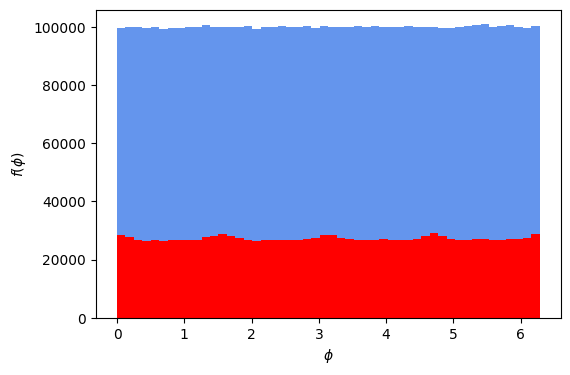

In [101]:
#%matplotlib inline
plt.figure(figsize=(6, 4), dpi=100)
theta_range=[0, 2*math.pi]
plt.hist(ph, density=False, bins=50, range=theta_range, color='cornflowerblue')
plt.hist(ph[hits], density=False, bins=50, range=theta_range, color='red')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$f(\phi)$')
plt.show()

In [102]:
print("{:d}/{:d}".format(len(th[hits]), len(th)))
eff = float(len(th[hits]))/len(th)
err = math.sqrt(eff*(1 - eff)/len(th))
print("ε = {:.4f}±{:.4f}".format(eff, err))

1360567/5000000
ε = 0.2721±0.0002


# Radiografia muonica

Quanto abbiamo visto è la base per simulare una distribuzione di raggi cosmici che attraversa un rivelatore e consentono di stimare il flusso atteso di raggi cosmici in funzione della direzione.

Se il rivelatore è posto in una cavità ed è sovrastato da materiale (es.: roccia), questo assorbirà parte dei raggi cosmici. Un deficit rispetto al flusso atteso dalla simulazione permette di misurare l'assorbimento, quindi lo spessore di materiale.

In questo modo si possono identificare cavità in zone inaccessibili.

Questa tecnica prende il nome di **radiografia muonica**, ed ha consentito di identificare cavità in siti archeologici, oppure di studiare i condotti di alcuni vulcani.

<img style="width: 500px" src="https://www.asimmetrie.it/images/23/INFN_Asimmetrie23_pag8_img2.jpg">

* [Attraverso la roccia -  La tecnologia della radiografia muonica](https://www.asimmetrie.it/attraverso-la-roccia) - Asimmetrie, INFN
* [Imaging of underground cavities with cosmic-ray muons from observations at Mt. Echia (Naples)](https://www.nature.com/articles/s41598-017-01277-3) Nature - scientific reports
* [Core Concept: Muography offers a new way to see inside a multitude of objects](https://www.pnas.org/content/118/14/e2104652118)
* [Il telescopio per muoni cosmici della metropolitana di Toledo a Napoli](https://web.infn.it/OCRA/misura-della-distribuzione-angolare-dei-muoni/)
* [Measurement of Cosmic Muon angular distribution and vertical integrated flux by 2m×2m RPC stack at IICHEP-Madurai](https://arxiv.org/abs/1706.00901)
* [Hidden chamber discovery in the underground Hellenistic necropolis of Neapolis by muography](https://www.nature.com/articles/s41598-023-32626-0) 